In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras

(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


In [2]:
model = keras.Sequential([
    # to 1-d array
    keras.layers.Flatten(input_shape=(28, 28)),
    # if there is no layers.Flatten, to need to write input layer lower after hidden
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 2.7211 - accuracy: 0.8426
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4198 - accuracy: 0.8989
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3080 - accuracy: 0.9209
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2642 - accuracy: 0.9344
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2262 - accuracy: 0.9423
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2148 - accuracy: 0.9450
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2006 - accuracy: 0.9497
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1930 - accuracy: 0.9506
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1886 - accuracy: 0.9531
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.183

In [3]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2674 - accuracy: 0.9422


[0.26742005348205566, 0.9422000050544739]

In [7]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)



Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 9.9287 - accuracy: 0.8394
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 6.0932 - accuracy: 0.8784
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.7182 - accuracy: 0.8813
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.6317 - accuracy: 0.8841
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.4549 - accuracy: 0.8854


313/313 [==============================] - 0s 835us/step


Text(95.72222222222221, 0.5, 'Truth')

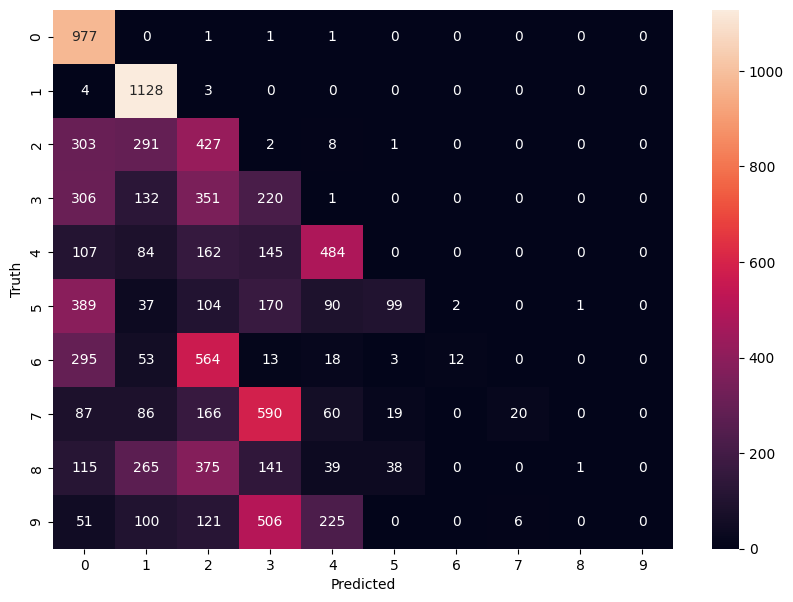

In [8]:
import seaborn as sn


y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [12]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3377 - accuracy: 0.8220
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4365 - accuracy: 0.8957
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3132 - accuracy: 0.9212
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2456 - accuracy: 0.9354
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2312 - accuracy: 0.9408


In [14]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2391 - accuracy: 0.9391


[0.23912382125854492, 0.9391000270843506]

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

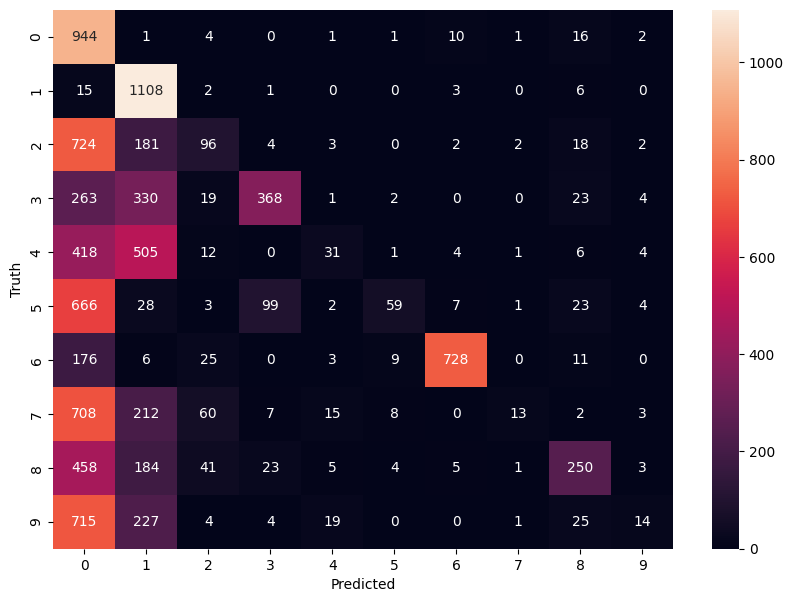

In [13]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [9]:
np.argmax(y_predicted[0])

3

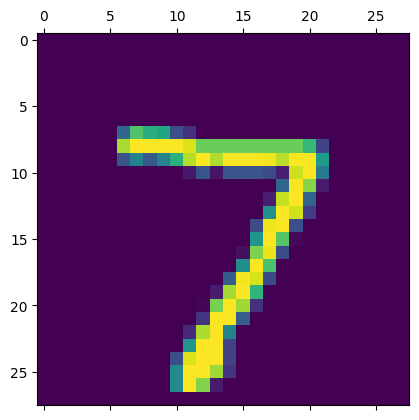

In [10]:
plt.axis('off')
plt.matshow(X_test[0])